In [15]:
# library & dataset
import seaborn as sns
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Simple box plot

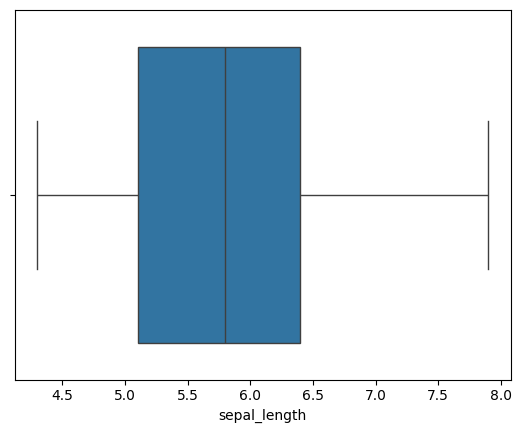

In [6]:
sns.boxplot(x=df["sepal_length"])
plt.show()

# Split box plot by category

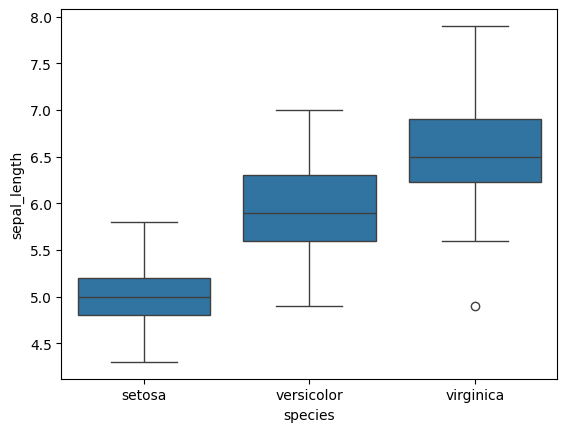

In [4]:
sns.boxplot(x=df["species"], y=df["sepal_length"])
plt.show()

# Boxplot by species

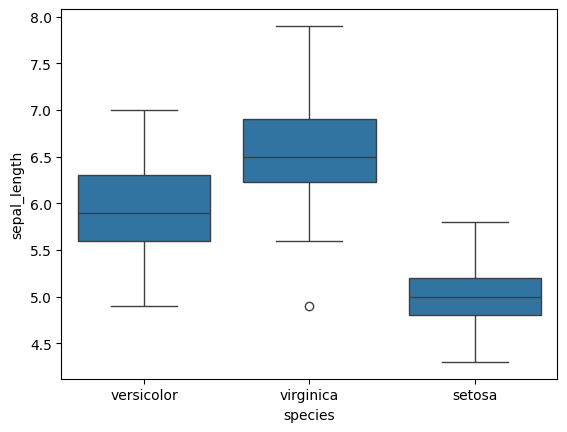

In [7]:
sns.boxplot(
    x=df["species"], y=df["sepal_length"], order=["versicolor", "virginica", "setosa"]
)
plt.show()

# Order by mean

In [13]:
# Find the order
my_order = (
    df.groupby("species")["sepal_length"].mean().sort_values(ascending=False).index
)
my_order

Index(['virginica', 'versicolor', 'setosa'], dtype='object', name='species')

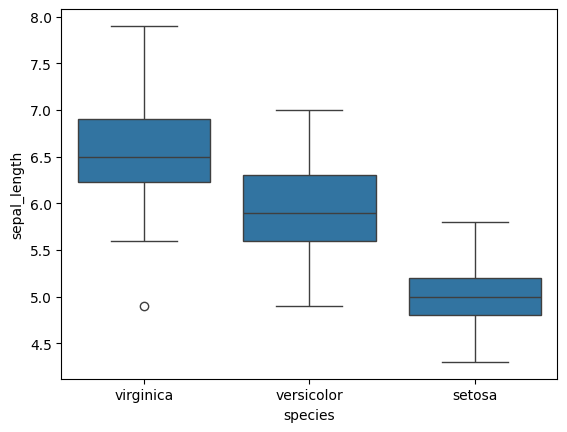

In [14]:
# Give it t the boxplot
sns.boxplot(x="species", y="sepal_length", data=df, order=my_order)
plt.show()

# Box plot distribution problem

In [17]:
# Dataset:
a = pd.DataFrame({"group": np.repeat("A", 500), "value": np.random.normal(10, 5, 500)})
b = pd.DataFrame({"group": np.repeat("B", 500), "value": np.random.normal(13, 1.2, 500)})
c = pd.DataFrame({"group": np.repeat("B", 500), "value": np.random.normal(18, 1.2, 500)})
d = pd.DataFrame({"group": np.repeat("C", 20), "value": np.random.normal(25, 4, 20)})
e = pd.DataFrame({"group": np.repeat("D", 100), "value": np.random.uniform(12, size=100)})
df = pd.concat([a, b, c, d, e])
df

,group,value
0,A,15.992059
1,A,15.467022
2,A,4.310975
3,A,13.115338
4,A,7.029378
...,...,...
95,D,1.959012
96,D,6.103340
97,D,3.568743
98,D,3.293521


# Usual box plot

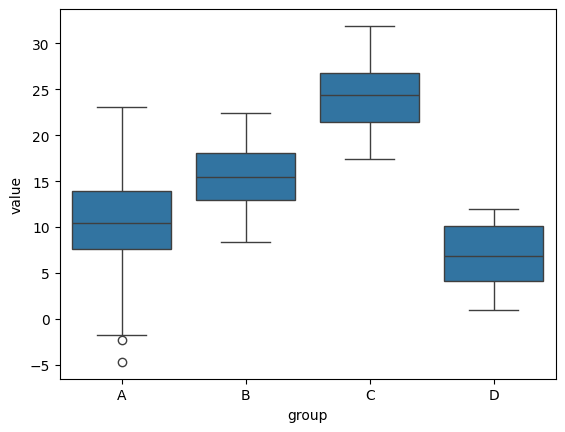

In [18]:
# Usual boxplot
sns.boxplot(x="group", y="value", data=df)
plt.show()

# box plot showing distribution using strip plot

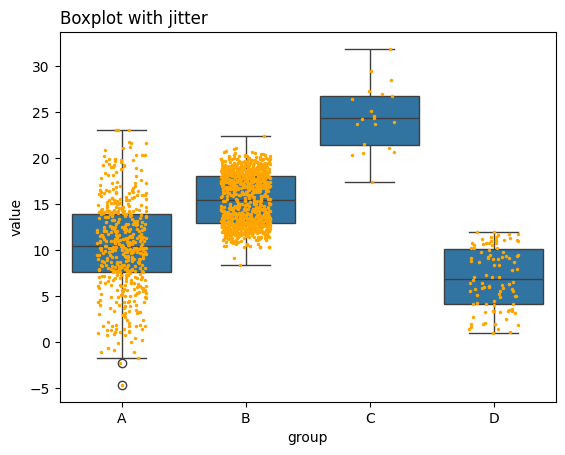

In [19]:
# boxplot
ax = sns.boxplot(x="group", y="value", data=df)
# add stripplot
ax = sns.stripplot(x="group", y="value", data=df, color="orange", jitter=0.2, size=2.5)

# add title
plt.title("Boxplot with jitter", loc="left")

# show the graph
plt.show()

# Add number of samples

In [39]:
# Calculate number of obs per group & median to position labels
medians = df.groupby("group")["value"].median().values
number_of_samples = df.groupby("group").size().values

array([ 500, 1000,   20,  100])

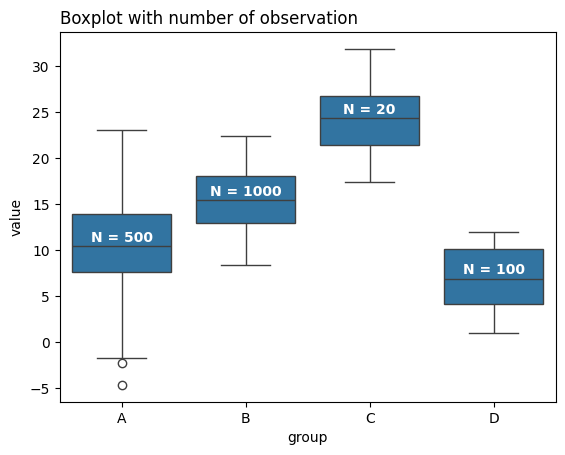

In [42]:
# Start with a basic boxplot
sns.boxplot(x="group", y="value", data=df)

# Add it to the plot
for idx, (median, number_of_samples_per_group) in enumerate(zip(medians, number_of_samples)):
    plt.text(
        x=idx,
        y=median+0.5,
        s=f"N = {number_of_samples_per_group}",
        horizontalalignment="center",
        size="medium",
        color="w",
        weight="semibold",
    )

# add title
plt.title("Boxplot with number of observation", loc="left")

# show the graph
plt.show()

# Using Violin plot

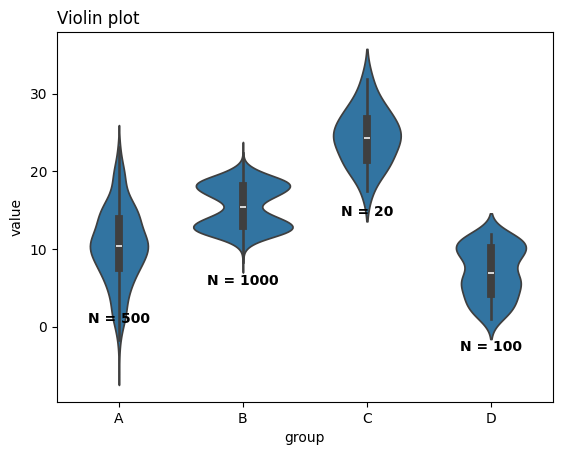

In [47]:
# plot violin chart
sns.violinplot(x="group", y="value", data=df)

# add title
plt.title("Violin plot", loc="left")

# # Add it to the plot
for idx, (median, number_of_samples_per_group) in enumerate(
    zip(medians, number_of_samples)
):
    plt.text(
        x=idx,
        y=median -10,
        s=f"N = {number_of_samples_per_group}",
        horizontalalignment="center",
        size="medium",
        color="black",
        weight="semibold",
    )

# show the graph
plt.show()